In [125]:
# LSTM for 1 dim air passengers prediction(time sequence)

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math


In [106]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler # used for preprocessing data like normalize/sclale/StandardScaler...
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [107]:
dataframe = read_csv('international-airline-passengers.csv',usecols=[1],engine='python',skipfooter=3)
dataset = dataframe.values.astype('float32')


data resource

https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line
    

[some knowledge about pandas readdata funciton]

API:详解 pandas.read_csv

https://blog.csdn.net/weixin_39175124/article/details/79434022

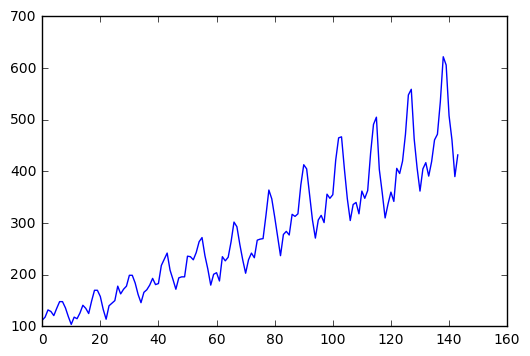

In [108]:
plt.plot(dataset)
plt.show()

In [109]:
# a function for prepocessing data into ifeature(X) and label(Y) 
def create_dataset(dataset,look_back=1):
    dataX = []
    dataY = []
    for i in range(len(dataset)-look_back-1):
        dataX.append(dataset[i:(i+look_back),0])
        dataY.append(dataset[(i+look_back),0])
    return np.array(dataX),np.array(dataY)



In [110]:
# normalize the dataset
scaler = MinMaxScaler(feature_range = (0,1))
dataset = scaler.fit_transform(dataset)

there is some knowledge about normarlizing!!

机器学习基础与实践（二）----数据转换

------------------------------------本博客所有内容以学习、研究和分享为主，如需转载，请联系本人，标明作者和出处，并且是非商业用途，谢谢！--------------------------------

https://www.cnblogs.com/charlotte77/p/5622325.html

In [111]:
# split into train and test
train_size = int(len(dataset)*0.67)
test_size = len(dataset)-train_size
train = dataset[:train_size,:]
test = dataset[train_size:,:]


In [127]:
# use the function to get input feature and label dataset
look_back= 3
trainX,trainY = create_dataset(train,look_back)
testX,testY = create_dataset(test,look_back)
trainY[:4]

array([0.04826255, 0.03281853, 0.05984557, 0.08494207], dtype=float32)

在所有的RNN中，包括simpleRNN, LSTM, GRU等等，输入输出数据格式如下：

Input: [samples, time steps, features]

Output:[samples, output_dim]

(if return_sequences=True)[smples,timesteps,output_dim]


 输入是一个三维向量。samples即为数据的条数。难以理解的是timesteps 和input_dim. Input_dim是数据的表示形式的维度，timestep则为总的时间步数。例如这样一个数据，总共100条句子，每个句子20个词，每个词都由一个80维的向量表示。在RNN中，每一个timestep的输入是一个词（当然这不一定，你也可以调成两个词或者其他），从第一张RNN的图来看，t0时刻是第一个时间步，x0则为代表一条句子中第一个词的80维向量，t1是第二个时间步，x1表示句子中第二个词的80维向量。。。所以，输入数据的大小应当是（100, 20, 80） 

In [132]:
#投入到 LSTM 的 X 需要有这样的结构： [samples, time steps, features]，所以做一下变换
# LSTM should have input like this [samples, time steps, features]
trainX = np.reshape(trainX,(trainX.shape[0],look_back,1))
testX = np.reshape(testX,(testX.shape[0],look_back,1))

keras：4)LSTM函数详解

https://blog.csdn.net/jiangpeng59/article/details/77646186

   keras中文文档: http://keras-cn.readthedocs.io/en/latest/layers/recurrent_layer/  (中文文档真的做的很赞，除了翻译的内容，还加了额外的内容，例如tensor, batch size的概念帮助DL新手理解
   
   https://www.zybuluo.com/hanbingtao/note/581764
   
   零基础入门深度学习(6) - 长短时记忆网络(LSTM)

In [134]:
# create and fit LSTM network
model = Sequential()
model.add(LSTM(4,input_shape = (look_back,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=100,batch_size=1,verbose=1)

Epoch 1/100
92/92 [==============================] - 2s 17ms/step - loss: 0.0090
Epoch 2/100
92/92 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 3/100
92/92 [==============================] - 0s 4ms/step - loss: 0.0046
Epoch 4/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 5/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 6/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 7/100
92/92 [==============================] - 1s 6ms/step - loss: 0.0035
Epoch 8/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 9/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 10/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 11/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 12/100
92/92 [==============================] - 1s 6ms/step - loss: 0.0033
Epoch 13/100
92/92 [================

In [135]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [136]:
# invert prediction into same unit 
# scaler.inverse_transform(scaler.transform(X))#将标准化后的数据转换成原来的数据

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [137]:
trainScore = math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
print('Train score:%.2f RMSE' %(trainScore))

Train score:22.33 RMSE


In [138]:
testScore = math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
print('Train score:%.2f RMSE' %(testScore))

Train score:49.95 RMSE


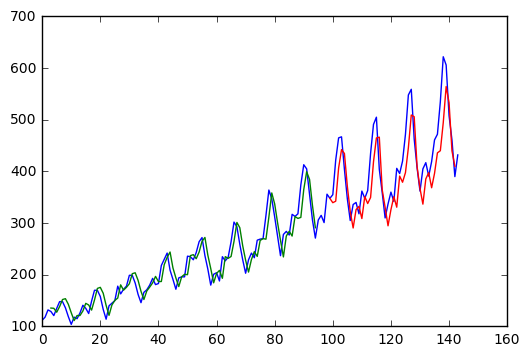

In [139]:
# plot

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:] = trainPredict

testPredictPlot =np.empty_like(dataset)
testPredictPlot[:,:] =np.nan
testPredictPlot[len(trainPredict)+look_back*2+1:len(dataset)-1,:] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

MARK ATTENTION!

it is different from the original code in input dimention!!!!!!! I think there is something wrong with the original code

oriiginal intruduction is 

用 LSTM 做时间序列预测的一个小例子(Chinese)

https://www.jianshu.com/p/38df71cad1f6
    
    
English

https://blog.csdn.net/u010412858/article/details/76153000

Time Series Prediction With Deep Learning in Keras

https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/
